## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap NULL scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [39]:
directory = '/home/user/notebooks/pcaps/nmap_null_scan_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [41]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.071194
Name: time, dtype: float64

In [42]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [43]:
scan_times
#duration_list

0    0.071194
1    0.058908
2    0.063502
3    0.059339
4    0.076958
5    0.055656
6    0.071239
7    0.055589
8    0.076536
9    0.055190
Name: Scan times, dtype: float64

In [44]:
temp = pd.DataFrame(duration_list)

In [45]:
temp.mean()

0    0.064411
dtype: float64

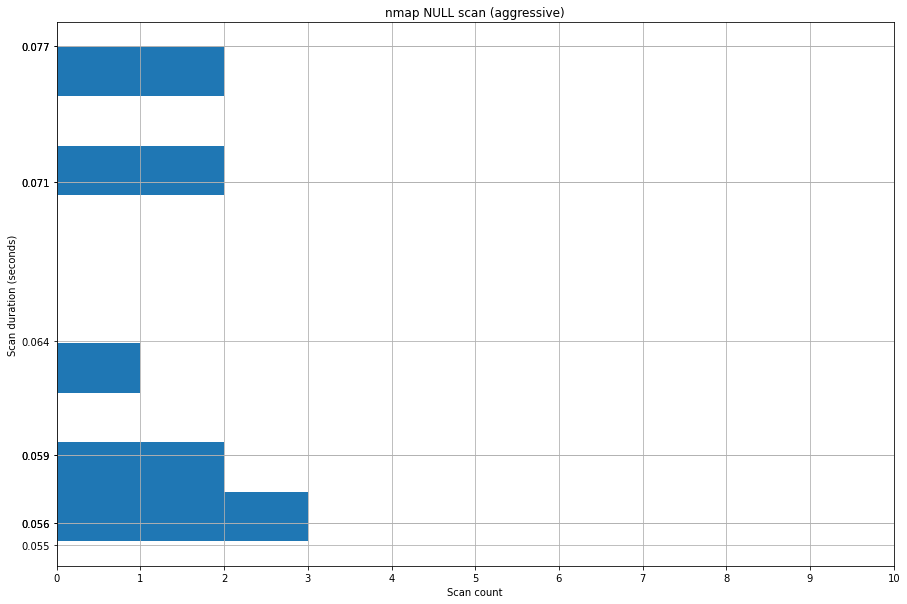

In [46]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [47]:
temp.describe()

,0
count,10.000000
mean,0.064411
std,0.008778
min,0.055190
25%,0.056469
50%,0.061421
75%,0.071228
max,0.076958


## Packet count

In [48]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [49]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [50]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1288.222312927246



## Order of ports scanned


In [51]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 49805 587
2 49805 995
3 49805 139
4 49805 1025
5 49805 3389
6 49805 3306
7 49805 111
8 49805 23
9 49805 993
10 49805 113
11 49805 22
12 49805 199
13 49805 143
14 49805 25
15 49805 21
16 49805 135
17 49805 445
18 49805 443
19 49805 8080
20 49805 8888
21 49805 256
22 49805 53
23 49805 1720
24 49805 5900
25 49805 554
26 49805 110
27 49805 80
28 49805 1723
29 49805 555
30 49805 900
31 49805 49
32 49805 3690
33 49805 3390
34 49805 1030
35 49805 1071
36 49805 8873
37 49805 873
38 49805 1
39 49805 1524
40 49805 1083
41 49805 26
42 49805 1322
43 49805 3998
44 49805 32777
45 49805 32780
46 49805 55055
47 49805 3000
48 49805 6502
49 49805 15002
50 49805 1069
51 49805 3826
52 49805 3914
53 49805 222
54 49805 44176
55 49805 56738
56 49805 9877
57 49805 12000
58 49805 8083
59 49805 9290
60 49805 6123
61 49805 2522
62 49805 49160
63 49805 1974
64 49805 5431
65 49805 2038
66 49805 3851
67 49805 1556
68 49805 1309
69 49805 1045
70 49805 2366
71 49805 9618
72 49805 15004
73 49805 62078
74 49805 1658


24 38716 256
25 38716 113
26 38716 143
27 38716 110
28 38716 995
29 38716 3017
30 38716 18040
31 38716 18101
32 38716 1092
33 38716 1688
34 38716 34572
35 38716 9944
36 38716 15002
37 38716 7777
38 38716 1132
39 38716 8100
40 38716 9998
41 38716 54045
42 38716 427
43 38716 9050
44 38716 55056
45 38716 7920
46 38716 666
47 38716 990
48 38716 44443
49 38716 1026
50 38716 1141
51 38716 7625
52 38716 1719
53 38716 5961
54 38716 8084
55 38716 5730
56 38716 1030
57 38716 2000
58 38716 2260
59 38716 2492
60 38716 61900
61 38716 545
62 38716 32768
63 38716 63331
64 38716 5904
65 38716 5001
66 38716 55055
67 38716 1524
68 38716 3809
69 38716 1107
70 38716 1971
71 38716 8192
72 38716 50001
73 38716 259
74 38716 3827
75 38716 749
76 38716 2043
77 38716 64623
78 38716 3323
79 38716 8031
80 38716 3659
81 38716 465
82 38716 1110
83 38716 13782
84 38716 17988
85 38716 3690
86 38716 4002
87 38716 5811
88 38716 1761
89 38716 4899
90 38716 5050
91 38716 25735
92 38716 119
93 38716 18988
94 38716 5226
95

70 38950 2920
71 38950 5087
72 38950 5050
73 38950 1029
74 38950 1076
75 38950 6667
76 38950 8600
77 38950 8011
78 38950 5961
79 38950 32775
80 38950 13783
81 38950 3476
82 38950 6112
83 38950 1717
84 38950 6
85 38950 1494
86 38950 17877
87 38950 1071
88 38950 32782
89 38950 800
90 38950 9000
91 38950 32769
92 38950 41511
93 38950 5102
94 38950 7800
95 38950 9418
96 38950 8443
97 38950 3809
98 38950 1023
99 38950 1052
100 38950 1839
101 38950 2043
102 38950 26214
103 38950 50636
104 38950 119
105 38950 9900
106 38950 15660
107 38950 1082
108 38950 765
109 38950 787
110 38950 3325
111 38950 2035
112 38950 1099
113 38950 1065
114 38950 9050
115 38950 3659
116 38950 16992
117 38950 3871
118 38950 700
119 38950 13722
120 38950 1062
121 38950 777
122 38950 8090
123 38950 1122
124 38950 6025
125 38950 8083
126 38950 44176
127 38950 6689
128 38950 3211
129 38950 1141
130 38950 3851
131 38950 1309
132 38950 27352
133 38950 541
134 38950 1123
135 38950 2020
136 38950 1067
137 38950 2135
138 389

648 38950 691
649 38950 8099
650 38950 3878
651 38950 9290
652 38950 7937
653 38950 1064
654 38950 55055
655 38950 43
656 38950 1972
657 38950 1007
658 38950 5414
659 38950 8000
660 38950 15742
661 38950 1043
662 38950 1277
663 38950 4001
664 38950 1057
665 38950 5633
666 38950 8654
667 38950 1328
668 38950 3889
669 38950 5810
670 38950 9502
671 38950 1152
672 38950 2525
673 38950 1271
674 38950 5850
675 38950 9415
676 38950 1310
677 38950 18988
678 38950 1311
679 38950 1434
680 38950 4224
681 38950 5907
682 38950 1864
683 38950 222
684 38950 8045
685 38950 7512
686 38950 1079
687 38950 544
688 38950 3001
689 38950 981
690 38950 49152
691 38950 50800
692 38950 4567
693 38950 7435
694 38950 1719
695 38950 23502
696 38950 1198
697 38950 1028
698 38950 7676
699 38950 1600
700 38950 5003
701 38950 52869
702 38950 2170
703 38950 6009
704 38950 24800
705 38950 5877
706 38950 5959
707 38950 8649
708 38950 4111
709 38950 50500
710 38950 2021
711 38950 10566
712 38950 1248
713 38950 82
714 3895

690 39166 8194
691 39166 16001
692 39166 8899
693 39166 1107
694 39166 43
695 39166 3007
696 39166 1117
697 39166 5269
698 39166 8021
699 39166 2492
700 39166 52822
701 39166 1185
702 39166 54045
703 39166 1801
704 39166 4449
705 39166 5054
706 39166 691
707 39166 2004
708 39166 8090
709 39166 6123
710 39166 25734
711 39166 1043
712 39166 10566
713 39166 1132
714 39166 1021
715 39166 1
716 39166 15660
717 39166 1862
718 39166 1024
719 39166 9110
720 39166 109
721 39166 11110
722 39166 7025
723 39166 17877
724 39166 26214
725 39166 667
726 39166 5987
727 39166 1033
728 39166 873
729 39166 1031
730 39166 63331
731 39166 2000
732 39166 34573
733 39166 6003
734 39166 2910
735 39166 1067
736 39166 28201
737 39166 4125
738 39166 711
739 39166 5825
740 39166 541
741 39166 6565
742 39166 2196
743 39166 19101
744 39166 3880
745 39166 5440
746 39166 8031
747 39166 5911
748 39166 9878
749 39166 9040
750 39166 32768
751 39166 50006
752 39166 1098
753 39166 49165
754 39166 5431
755 39166 9618
756 3

689 34435 52822
690 34435 2002
691 34435 8009
692 34435 44442
693 34435 7019
694 34435 44443
695 34435 3551
696 34435 3527
697 34435 2038
698 34435 5550
699 34435 5679
700 34435 5810
701 34435 497
702 34435 5298
703 34435 1055
704 34435 3269
705 34435 264
706 34435 1131
707 34435 2020
708 34435 60443
709 34435 514
710 34435 1053
711 34435 9593
712 34435 2041
713 34435 1972
714 34435 5950
715 34435 2401
716 34435 3801
717 34435 2608
718 34435 5000
719 34435 458
720 34435 2040
721 34435 1078
722 34435 7676
723 34435 5101
724 34435 32770
725 34435 3690
726 34435 5850
727 34435 5190
728 34435 1073
729 34435 8081
730 34435 3324
731 34435 9595
732 34435 1296
733 34435 5269
734 34435 84
735 34435 9998
736 34435 43
737 34435 3404
738 34435 6666
739 34435 2222
740 34435 1050
741 34435 1002
742 34435 1272
743 34435 5080
744 34435 5560
745 34435 2000
746 34435 10003
747 34435 9999
748 34435 10617
749 34435 15000
750 34435 41511
751 34435 2160
752 34435 1175
753 34435 873
754 34435 1503
755 34435 

253 64003 3828
254 64003 631
255 64003 990
256 64003 2040
257 64003 16080
258 64003 1935
259 64003 1070
260 64003 2800
261 64003 9010
262 64003 3971
263 64003 1057
264 64003 56738
265 64003 44443
266 64003 4444
267 64003 280
268 64003 1121
269 64003 9503
270 64003 2702
271 64003 2045
272 64003 6510
273 64003 16016
274 64003 5925
275 64003 648
276 64003 2401
277 64003 1864
278 64003 5802
279 64003 5952
280 64003 25734
281 64003 4001
282 64003 6059
283 64003 992
284 64003 9900
285 64003 88
286 64003 6106
287 64003 7019
288 64003 7200
289 64003 1524
290 64003 3030
291 64003 1071
292 64003 3878
293 64003 8654
294 64003 7435
295 64003 3476
296 64003 1296
297 64003 10010
298 64003 4899
299 64003 7001
300 64003 9876
301 64003 41511
302 64003 3269
303 64003 8181
304 64003 49167
305 64003 2222
306 64003 6699
307 64003 2001
308 64003 4443
309 64003 8081
310 64003 6646
311 64003 524
312 64003 1721
313 64003 34573
314 64003 2119
315 64003 4343
316 64003 2811
317 64003 7741
318 64003 5003
319 64003

837 64003 1100
838 64003 3945
839 64003 10566
840 64003 10000
841 64003 3801
842 64003 1166
843 64003 593
844 64003 4004
845 64003 1218
846 64003 5190
847 64003 7778
848 64003 563
849 64003 8011
850 64003 5998
851 64003 2382
852 64003 52822
853 64003 9101
854 64003 5221
855 64003 50300
856 64003 17877
857 64003 2323
858 64003 548
859 64003 5903
860 64003 7512
861 64003 3369
862 64003 9102
863 64003 1185
864 64003 616
865 64003 1984
866 64003 82
867 64003 5510
868 64003 1154
869 64003 259
870 64003 6123
871 64003 65000
872 64003 911
873 64003 16001
874 64003 1998
875 64003 9009
876 64003 3800
877 64003 5080
878 64003 406
879 64003 3
880 64003 49155
881 64003 6000
882 64003 5961
883 64003 222
884 64003 109
885 64003 8300
886 64003 1334
887 64003 5911
888 64003 161
889 64003 6901
890 64003 3998
891 64003 7496
892 64003 1098
893 64003 2604
894 64003 2383
895 64003 5431
896 64003 8994
897 64003 55055
898 64003 6001
899 64003 4125
900 64003 6112
901 64003 1165
902 64003 20221
903 64003 35500

855 55164 1801
856 55164 38292
857 55164 808
858 55164 1048
859 55164 1192
860 55164 898
861 55164 8383
862 55164 8873
863 55164 10616
864 55164 1687
865 55164 687
866 55164 1036
867 55164 8402
868 55164 49159
869 55164 45100
870 55164 2111
871 55164 2260
872 55164 1080
873 55164 749
874 55164 5959
875 55164 555
876 55164 32772
877 55164 1236
878 55164 3370
879 55164 1085
880 55164 8800
881 55164 16018
882 55164 3986
883 55164 3869
884 55164 1050
885 55164 5061
886 55164 7920
887 55164 32779
888 55164 1998
889 55164 1186
890 55164 49160
891 55164 20031
892 55164 49400
893 55164 27352
894 55164 1
895 55164 6969
896 55164 2009
897 55164 7921
898 55164 2869
899 55164 1110
900 55164 4443
901 55164 5432
902 55164 1063
903 55164 1075
904 55164 912
905 55164 5087
906 55164 2875
907 55164 407
908 55164 3300
909 55164 16000
910 55164 49167
911 55164 3333
912 55164 3325
913 55164 787
914 55164 2045
915 55164 1058
916 55164 7435
917 55164 5679
918 55164 6002
919 55164 1081
920 55164 3546
921 5516

452 40065 1113
453 40065 85
454 40065 5003
455 40065 2161
456 40065 683
457 40065 1148
458 40065 2047
459 40065 1102
460 40065 2399
461 40065 3905
462 40065 37
463 40065 5357
464 40065 2010
465 40065 1053
466 40065 3221
467 40065 7999
468 40065 901
469 40065 1801
470 40065 27356
471 40065 34571
472 40065 1138
473 40065 8085
474 40065 1503
475 40065 1045
476 40065 32779
477 40065 2135
478 40065 1455
479 40065 5810
480 40065 12000
481 40065 4446
482 40065 1501
483 40065 2323
484 40065 1524
485 40065 4998
486 40065 5102
487 40065 8600
488 40065 417
489 40065 49167
490 40065 2100
491 40065 1805
492 40065 987
493 40065 2022
494 40065 1123
495 40065 1311
496 40065 2557
497 40065 5225
498 40065 911
499 40065 2910
500 40065 41511
501 40065 3784
502 40065 8031
503 40065 12265
504 40065 458
505 40065 42510
506 40065 3371
507 40065 1096
508 40065 8649
509 40065 52673
510 40065 900
511 40065 10566
512 40065 5060
513 40065 1137
514 40065 52822
515 40065 3000
516 40065 8192
517 40065 8002
518 40065 

22 44269 5900
23 44269 135
24 44269 256
25 44269 143
26 44269 443
27 44269 23
28 44269 995
29 44269 4567
30 44269 9595
31 44269 3766
32 44269 515
33 44269 2007
34 44269 1113
35 44269 212
36 44269 65000
37 44269 1098
38 44269 32
39 44269 6566
40 44269 20222
41 44269 8042
42 44269 19101
43 44269 481
44 44269 5666
45 44269 2005
46 44269 8800
47 44269 49161
48 44269 99
49 44269 2047
50 44269 1001
51 44269 458
52 44269 8400
53 44269 9200
54 44269 4003
55 44269 1058
56 44269 10243
57 44269 563
58 44269 2043
59 44269 726
60 44269 1175
61 44269 2383
62 44269 8083
63 44269 27715
64 44269 5915
65 44269 2288
66 44269 4224
67 44269 49176
68 44269 5222
69 44269 33
70 44269 119
71 44269 464
72 44269 9968
73 44269 705
74 44269 264
75 44269 21571
76 44269 306
77 44269 1580
78 44269 1064
79 44269 9943
80 44269 3493
81 44269 1192
82 44269 631
83 44269 41511
84 44269 49153
85 44269 3527
86 44269 3300
87 44269 6106
88 44269 1047
89 44269 9485
90 44269 55055
91 44269 1028
92 44269 51493
93 44269 548
94 442

679 44269 13783
680 44269 22939
681 44269 24444
682 44269 1839
683 44269 2869
684 44269 1102
685 44269 8300
686 44269 1071
687 44269 425
688 44269 1296
689 44269 49175
690 44269 10180
691 44269 4343
692 44269 32771
693 44269 1213
694 44269 2126
695 44269 1077
696 44269 5961
697 44269 1862
698 44269 1658
699 44269 7103
700 44269 38292
701 44269 5226
702 44269 808
703 44269 8090
704 44269 163
705 44269 3889
706 44269 3077
707 44269 14442
708 44269 9110
709 44269 3517
710 44269 100
711 44269 14238
712 44269 5678
713 44269 50006
714 44269 15000
715 44269 8009
716 44269 109
717 44269 1110
718 44269 2119
719 44269 3659
720 44269 90
721 44269 1057
722 44269 6002
723 44269 888
724 44269 1096
725 44269 7627
726 44269 1501
727 44269 9618
728 44269 1123
729 44269 5550
730 44269 1086
731 44269 301
732 44269 15660
733 44269 8181
734 44269 50500
735 44269 749
736 44269 2038
737 44269 5963
738 44269 34573
739 44269 1009
740 44269 1119
741 44269 3371
742 44269 57797
743 44269 465
744 44269 9593
745 44

688 40942 880
689 40942 50500
690 40942 1112
691 40942 5998
692 40942 2968
693 40942 10001
694 40942 1037
695 40942 7435
696 40942 3800
697 40942 9081
698 40942 7200
699 40942 4443
700 40942 1000
701 40942 987
702 40942 50000
703 40942 8181
704 40942 5060
705 40942 1165
706 40942 5960
707 40942 1031
708 40942 10616
709 40942 2007
710 40942 465
711 40942 3828
712 40942 1434
713 40942 1104
714 40942 1234
715 40942 2492
716 40942 7106
717 40942 2126
718 40942 32780
719 40942 8087
720 40942 1100
721 40942 161
722 40942 9999
723 40942 8649
724 40942 44442
725 40942 10566
726 40942 3851
727 40942 1040
728 40942 301
729 40942 3325
730 40942 18040
731 40942 3011
732 40942 8100
733 40942 10002
734 40942 5679
735 40942 8701
736 40942 4125
737 40942 1192
738 40942 5862
739 40942 6667
740 40942 49
741 40942 5214
742 40942 24800
743 40942 666
744 40942 16018
745 40942 14442
746 40942 10621
747 40942 5003
748 40942 3300
749 40942 912
750 40942 2013
751 40942 1026
752 40942 1010
753 40942 19315
754 4

In [52]:
orders_port

,scannr,sport,dport
0,1,49805,587
1,2,49805,995
2,3,49805,139
3,4,49805,1025
4,5,49805,3389
...,...,...,...
9995,996,40942,7676
9996,997,40942,6689
9997,998,40942,1122
9998,999,40942,3369


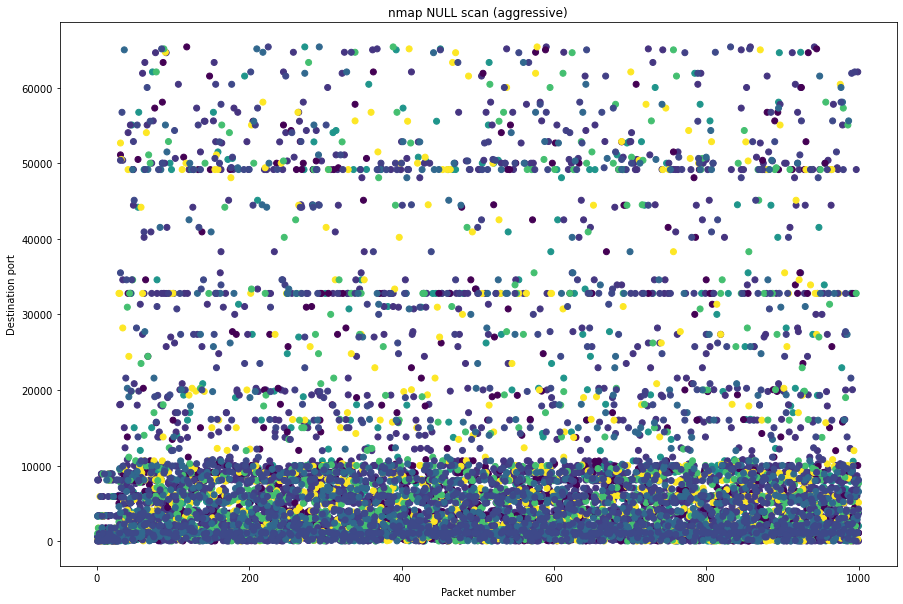

In [53]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [54]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [55]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

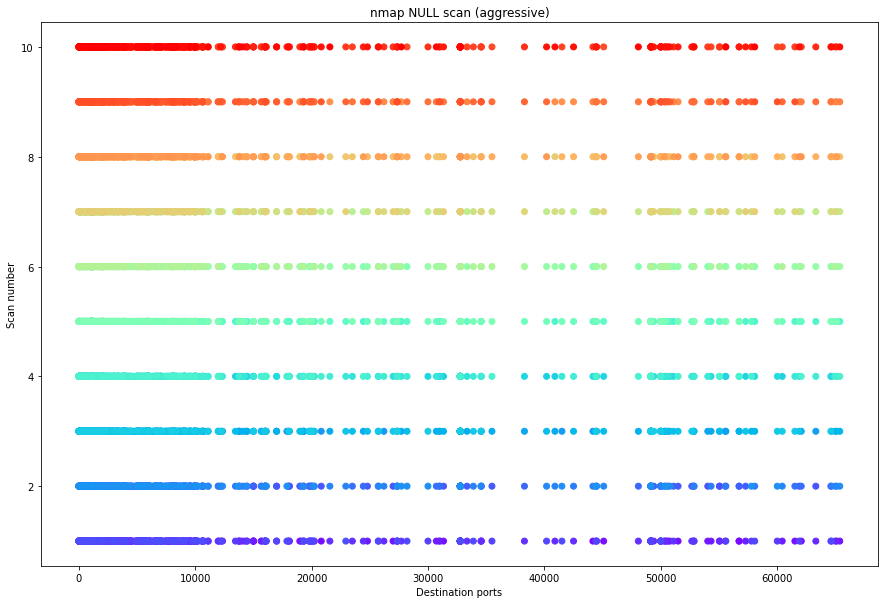

In [56]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [57]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

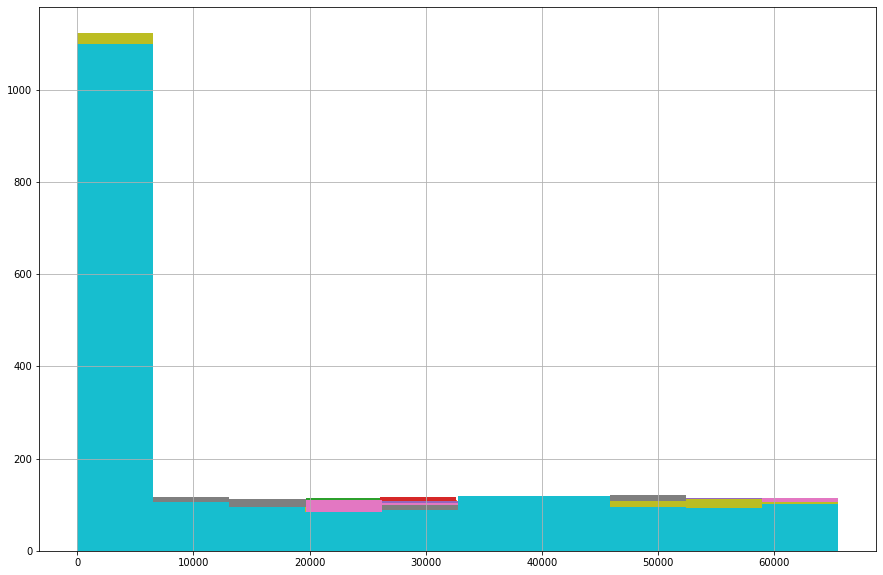

In [61]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

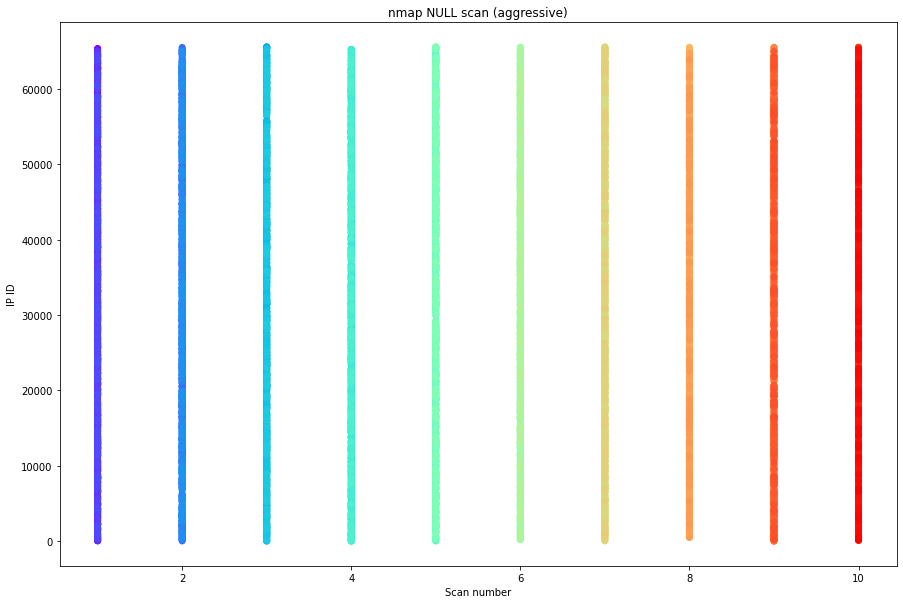

In [62]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

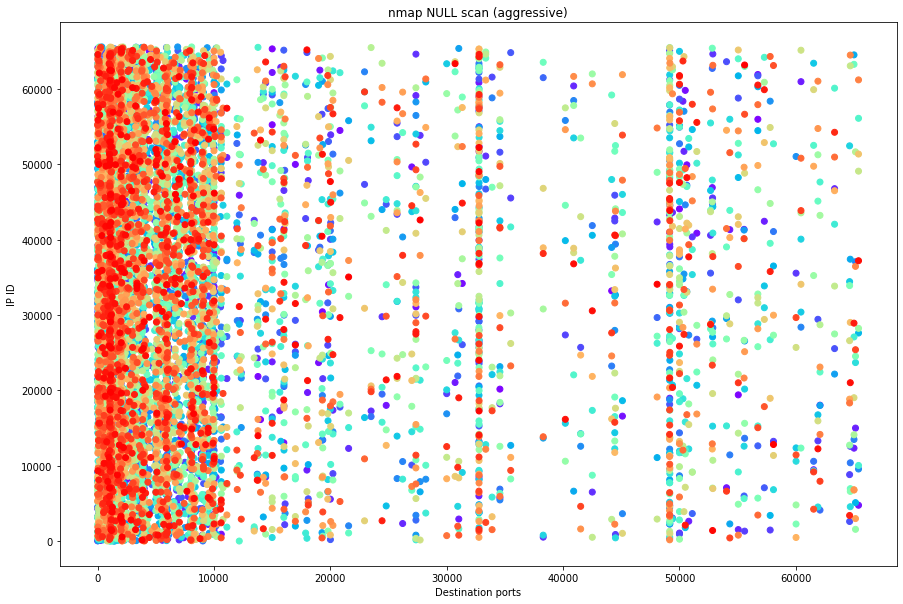

In [63]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])


if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

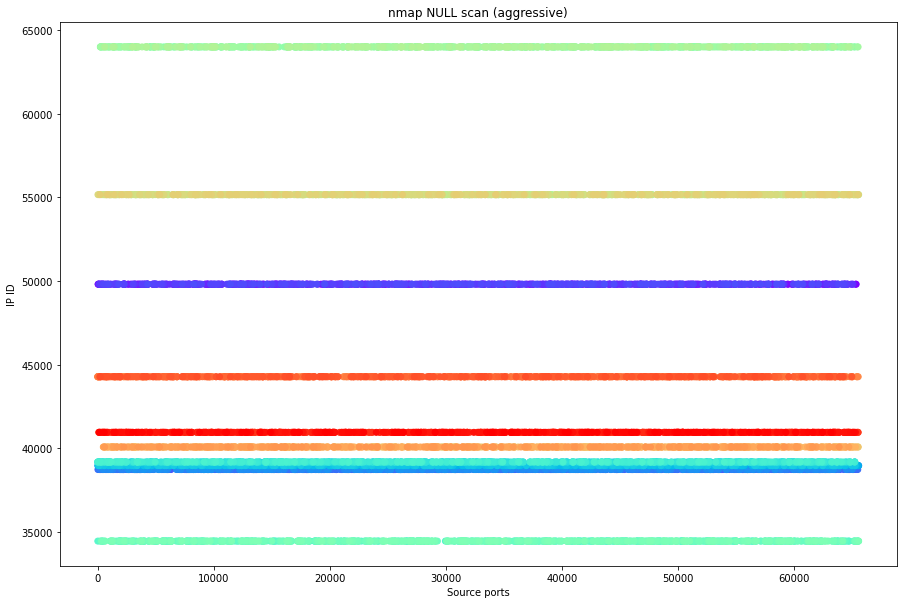

In [64]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [65]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
-----
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Pack

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
-----
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Pack

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [66]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [67]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 167

Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 167

Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 1672917928
Sequence number: 167

Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 169

Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 1695506582
Sequence number: 169

Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
S

Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
Sequence number: 981799142
S

Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 245

Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 2457941700
Sequence number: 245

Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 415

Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 4158415517
Sequence number: 415

Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 164

Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 1646861418
Sequence number: 164

Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 323

Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 3238135560
Sequence number: 323

Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 197

Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 1971405951
Sequence number: 197

Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 231

Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 2317950487
Sequence number: 231

Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
S

Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
Sequence number: 634506572
S

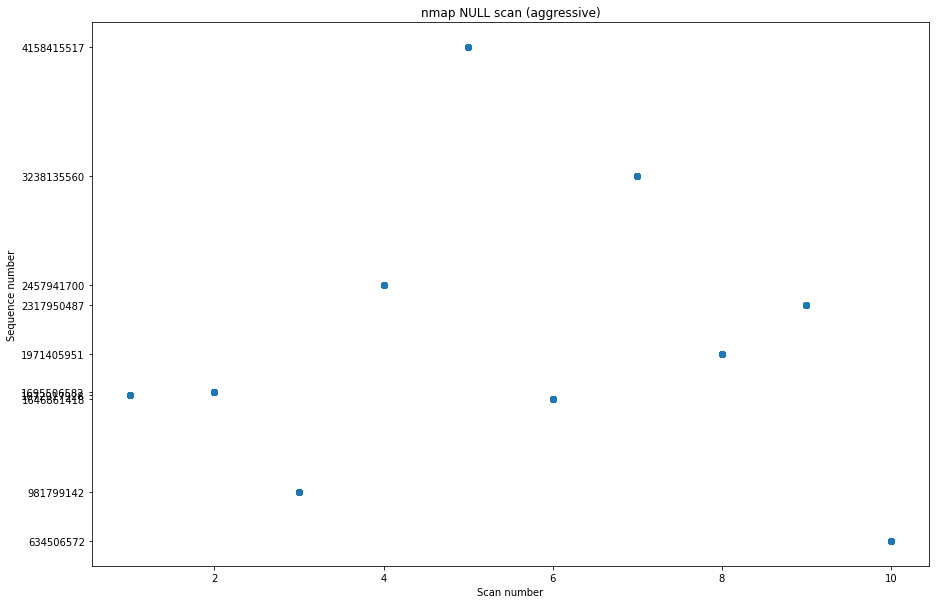

In [68]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


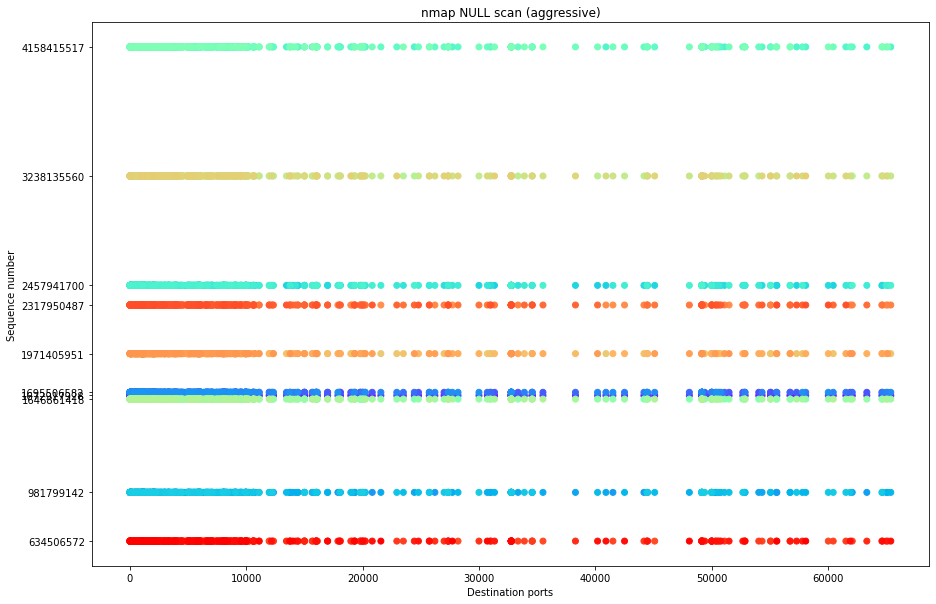

In [69]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

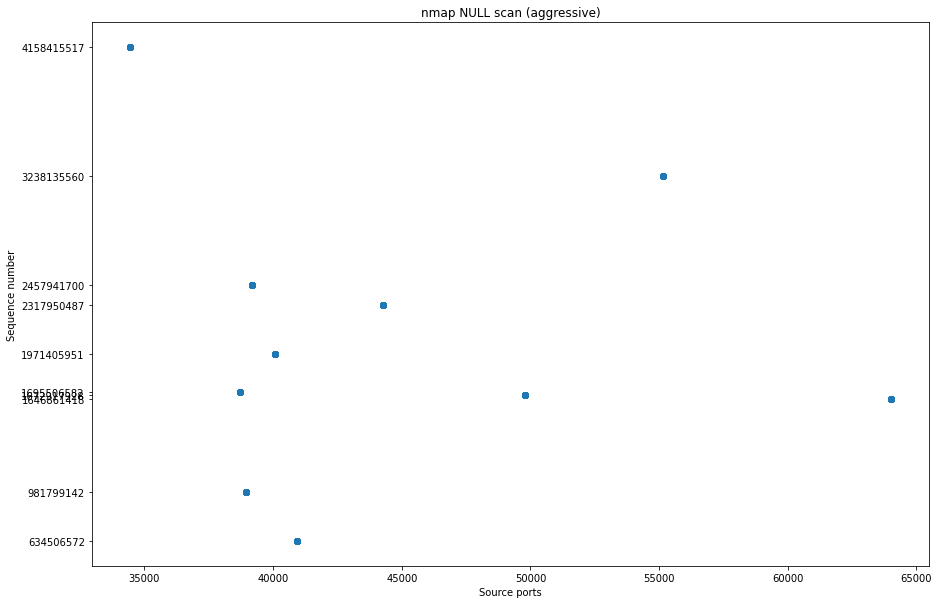

In [70]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [71]:
len(set(orders_port['sport']))

10

## Flags

In [72]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan